# Spaceship-titanic competition

#### Import necessary libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandasql import sqldf

Now i will load the data

In [64]:
train = pd.read_csv("spaceship-titanic\\train.csv")
test = pd.read_csv("spaceship-titanic\\test.csv")
sample_submission = pd.read_csv("spaceship-titanic\\sample_submission.csv")
display(train.head(5))
display(test.head(5))
display(train.info())
display(test.info())
display(train.isnull().sum())
display(test.isnull().sum())



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


None

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### General summary to data

1. Shape
   - train is 8693 x 14
   - test is 4277 x 13
   - train has Transported column which is a classification
2. Types
   - 7 columns are object
   - 6 columns are float64
   - classification column is boolean
3. Missing values
   - only columns PassengerId and transported doesn't have any missing values 

,sum,%
PassengerId,0,0.00
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39


,sum,%
PassengerId,0,0.00
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29


<Axes: title={'center': 'missing values in test'}>

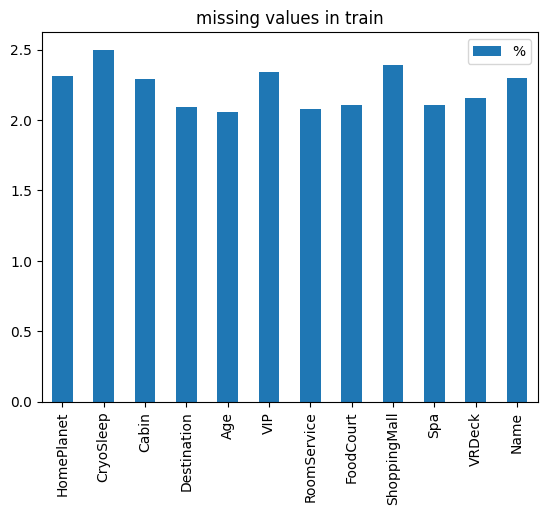

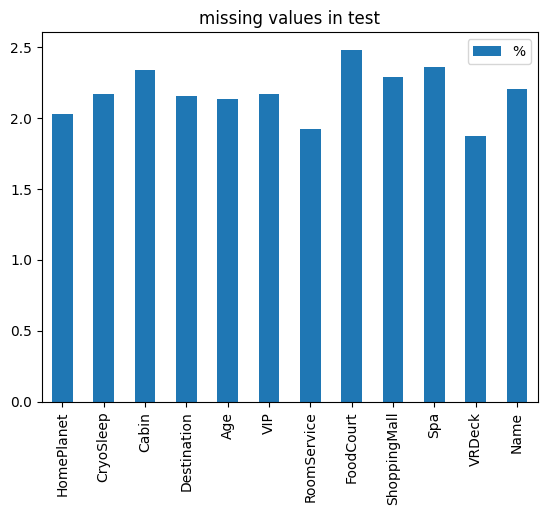

In [65]:
missing_values_train = pd.DataFrame({'sum':train.isnull().sum(),
                                     '%': (train.isnull().mean()*100).round(2)})
display(missing_values_train)

missing_values_train[missing_values_train['%']>0].plot(
    kind='bar',
    y='%',
    title='missing values in train'
)

missing_values_test= pd.DataFrame({'sum':test.isnull().sum(),
                                     '%': (test.isnull().mean()*100).round(2)})
display(missing_values_test)

missing_values_test[missing_values_test['%']>0].plot(
    kind='bar',
    y='%',
    title='missing values in test'
)


In both train and test misssing values represents less or equal 2.5% so all columns according to missing values can be used to training

In [66]:
display(train.describe())
display(train.describe(include=['O', 'bool']))
display(test.describe())
display(test.describe(include=['O', 'bool']))

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


Passenger id and name are usesless so i delete them

In [67]:
combined = [train.copy(), test.copy()]
for i in combined:
    i.drop(columns=[ 'Name', 'PassengerId'], inplace = True)

display(combined[0].columns)


Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

Cabin can be splited to 3 columns

In [68]:
for i in combined:
    i[['Cabin1', 'Cabin2', 'Cabin3']] = i['Cabin'].str.split('/',expand=True)
    i=i.drop(columns=['Cabin'], inplace=True)

There are a variety metods to deal with missing values. For example:
- Numeric columns fill with median/zeros/mean/correlation with other cols
- Categoric columns fill with value 'missing'/mode

Personally i would test all of these metods

In [69]:
train['VIP']=train['VIP'].astype(object)
test['VIP']=test['VIP'].astype(object)
combined1 = []
combined2 = []
combined3 = []
combined4 = []
combined5 = []
combined6 = []
combined7 = []
combined8 = []

all_combined = [combined1, combined2, combined3, combined4,
                 combined5, combined6, combined7, combined8]
for i in all_combined:
    i.append(combined[0].copy())
    i.append(combined[1].copy())
imp = IterativeImputer(random_state=0)

float_cols = combined[0].select_dtypes(include='float64').columns
object_cols = combined[0].select_dtypes(include='object').columns
for i in combined1:
    i[float_cols] = i[float_cols].fillna(i[float_cols].median())
    i[object_cols]= i[object_cols].fillna('missing')   

for i in combined2:
    i[float_cols] = i[float_cols].fillna(i[float_cols].median())
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])   
for i in combined3:
    i[float_cols] = i[float_cols].fillna(i[float_cols].mean())
    i[object_cols]= i[object_cols].fillna('missing')   

for i in combined4:
    i[float_cols] = i[float_cols].fillna(i[float_cols].mean())
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])   

for i in combined5:
    i[float_cols] = i[float_cols].fillna(0)
    i[object_cols]= i[object_cols].fillna('missing')   
for i in combined6:
    i[float_cols] = i[float_cols].fillna(0)
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])

for i in combined7:
    i[float_cols] = imp.fit_transform(i[float_cols])
    i[object_cols]= i[object_cols].fillna('missing')   
for i in combined8:
    i[float_cols] = imp.fit_transform(i[float_cols])
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])   

C:\Users\konra\AppData\Local\Temp\ipykernel_23472\2807768035.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])
C:\Users\konra\AppData\Local\Temp\ipykernel_23472\2807768035.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])
C:\Users\konra\AppData\Local\Temp\ipykernel_23472\2807768035.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. C

In [70]:
for k,i in enumerate(all_combined):
    sum_of_missing_val=0
    for j in i:
        sum_of_missing_val= sum_of_missing_val+j.isnull().sum().sum()
    if sum_of_missing_val > 0:
        print(f"combined{k+1} has {sum_of_missing_val} missing values")
    else:
        print(f"combined{k+1} has no missing values")

combined1 has no missing values
combined2 has no missing values
combined3 has no missing values
combined4 has no missing values
combined5 has no missing values
combined6 has no missing values
combined7 has no missing values
combined8 has no missing values


In [71]:
for i in all_combined:
    for j in i:
        j['Cabin2']=j['Cabin2'].astype('category').cat.codes
        j['Cabin2'] = j['Cabin2'].astype('float64')

In [72]:
query ="""
Select Transported, Count(*) as sum
from train
Group by Transported
"""
result = sqldf(query, locals())
result= result.set_index('Transported')
print(result)

              sum
Transported      
0            4315
1            4378


Now i will check connection between target column and each column for this i will use combined1

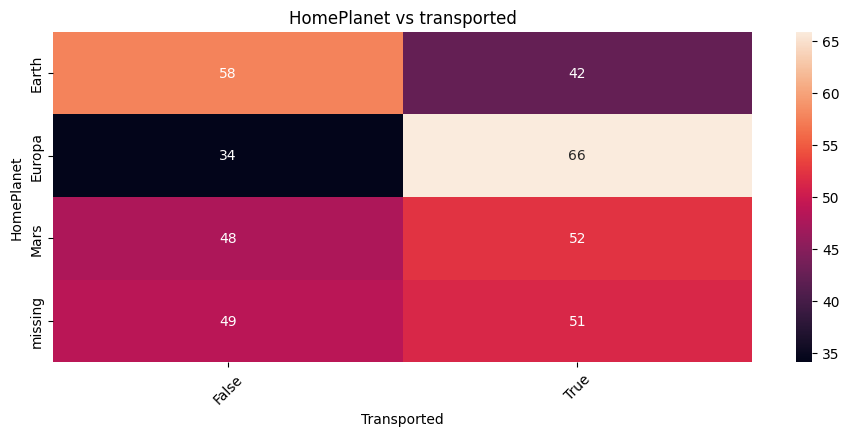

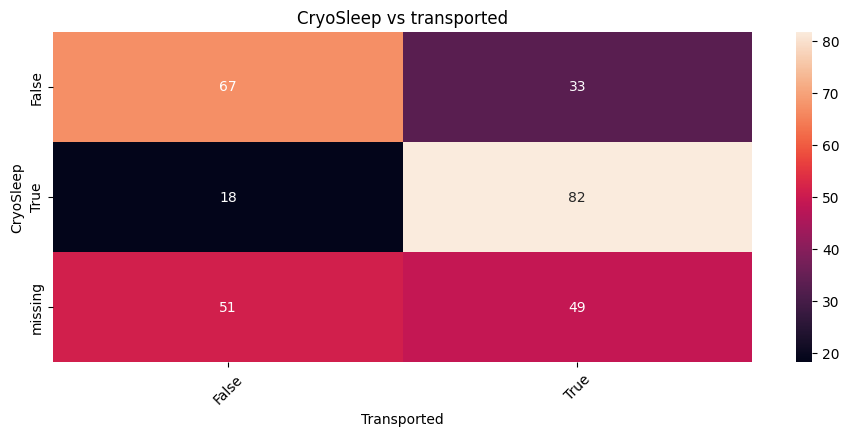

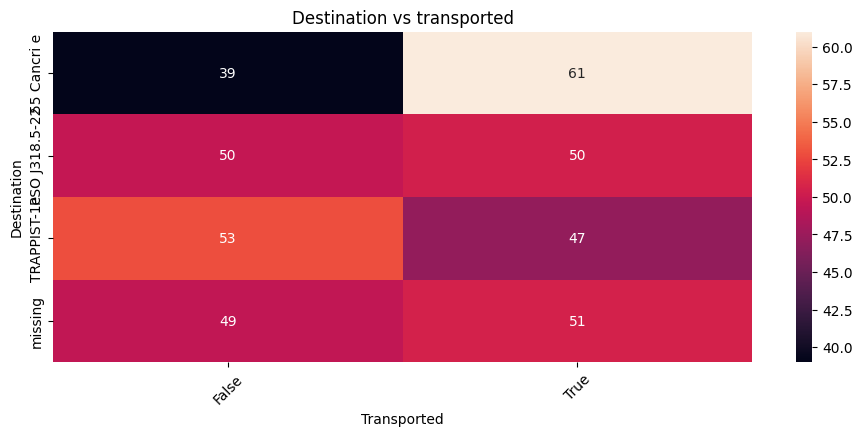

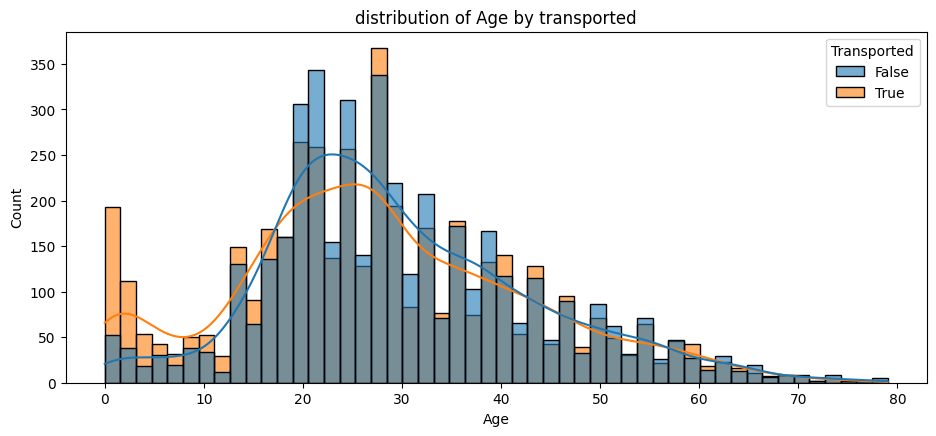

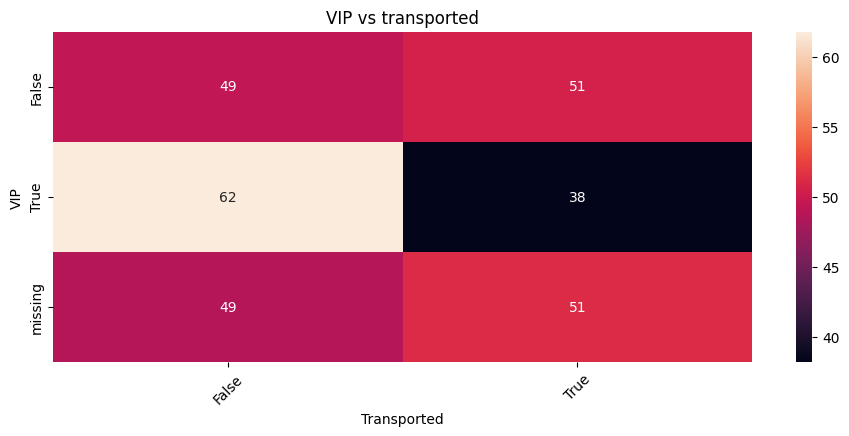

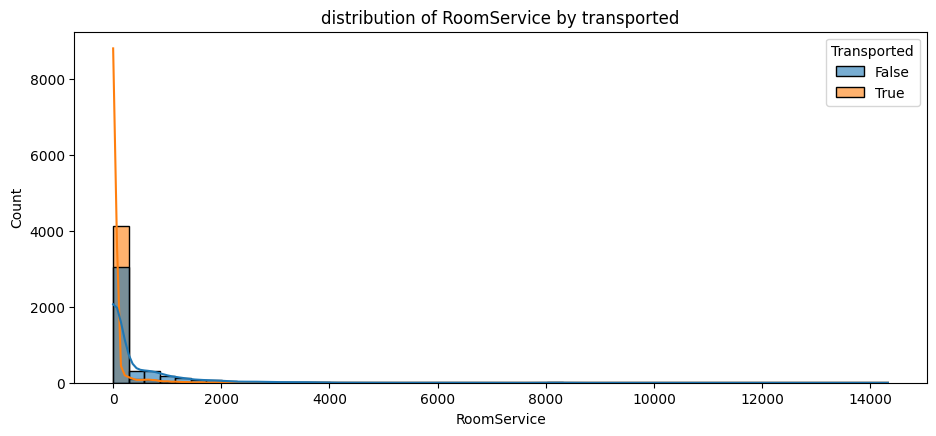

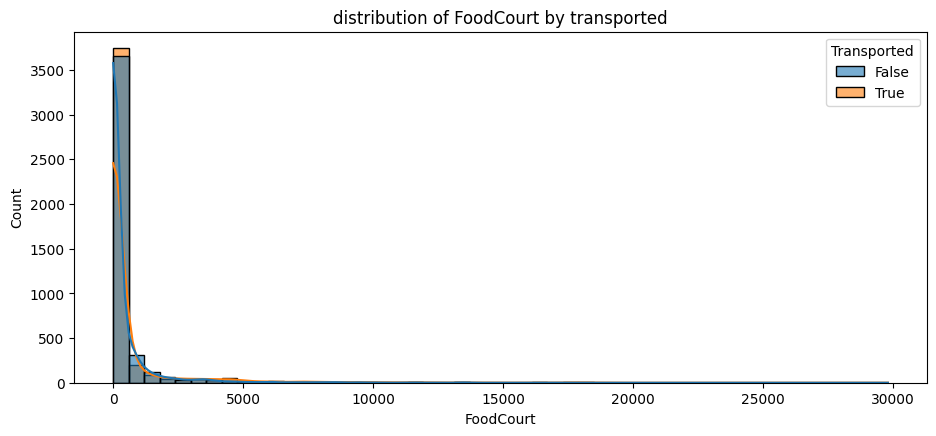

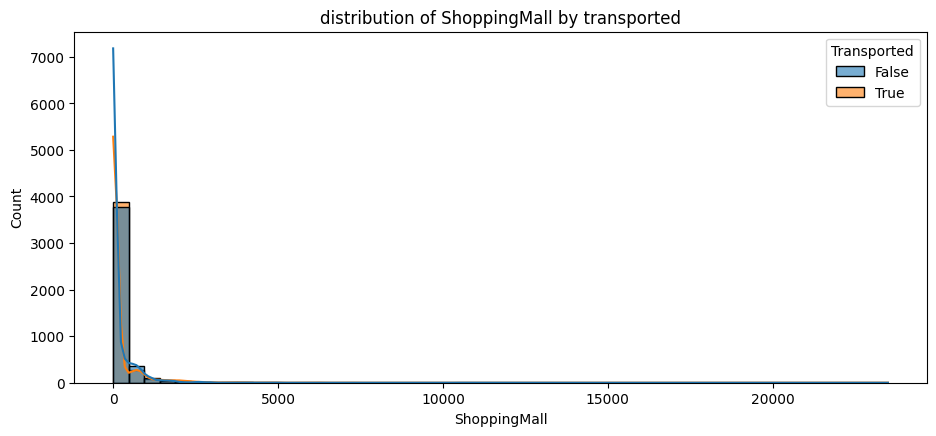

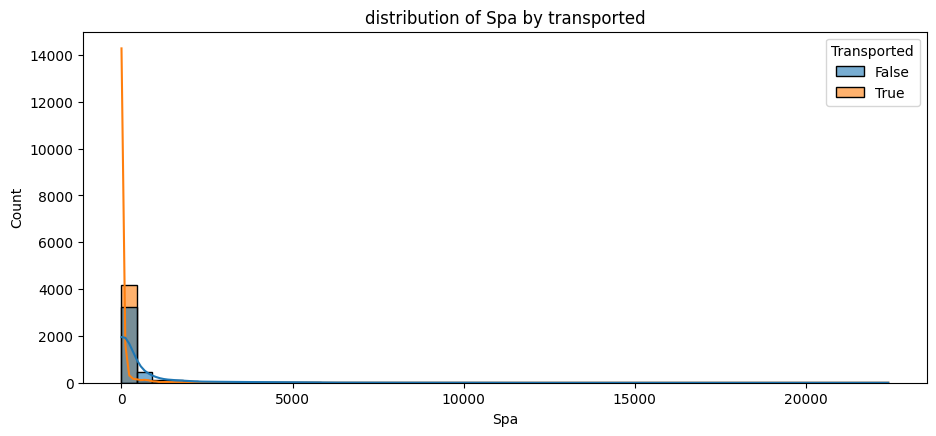

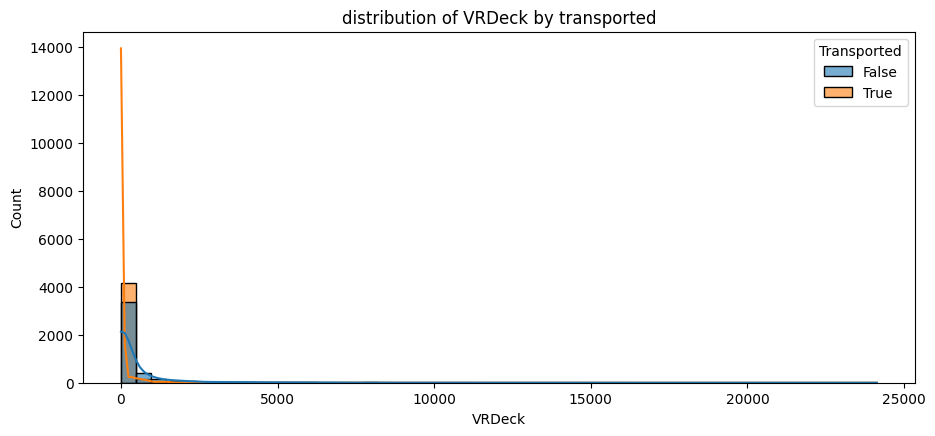

<Figure size 1000x500 with 0 Axes>

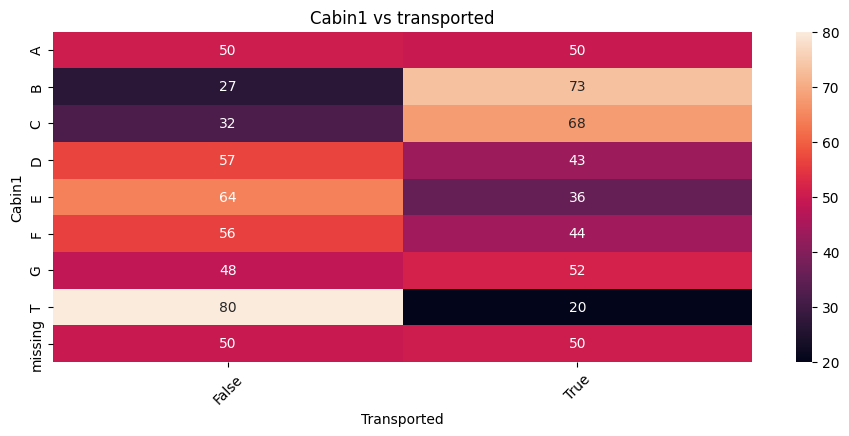

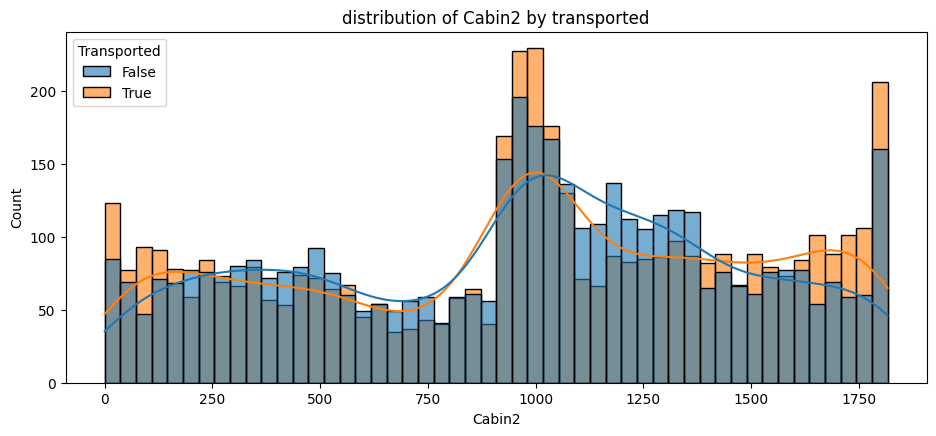

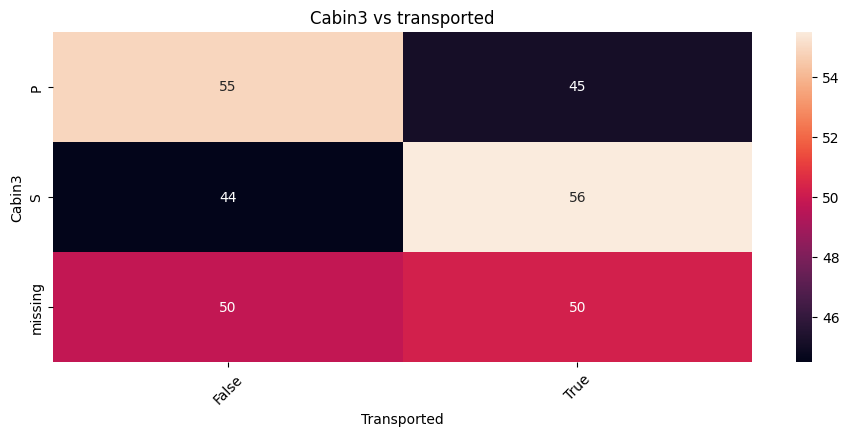

In [73]:
cols_num = combined1[0].select_dtypes(include='float64').columns
cols_obj = combined1[0].select_dtypes(include='object').columns
# print(f"num={cols_num}, obj = {cols_obj}")
# print(f'all = {combined1[0].columns}')

for i, col in enumerate(combined1[0].columns):
    plt.figure(figsize=(10, 5))

    if col in cols_num:
        ax= sns.histplot(data=combined1[0], x=col, hue='Transported', kde = True, bins = 50 ,alpha=0.6) 
        ax.set_title(f"distribution of {col} by transported")
    #sns.boxplot(x='target', y='feature', data=df)
    if col in cols_obj:
        #pd.crosstab(df['feature'], df['target']).plot(kind='bar', stacked=True)
        crosstab = pd.crosstab(combined1[0][col], combined1[0]['Transported'],normalize='index')*100
        sns.heatmap(crosstab, annot=True)
        plt.title(f"{col} vs transported")
        plt.xticks(rotation=45)

    plt.tight_layout(pad=3)



the feature is significant if in row the color is different , and in histplot when the distribution lines are different

Probably foodcourt, shopping mall are usesless. some other columns can be considered as usesless like cabin2, destination, vip, cabin3

In [75]:
for i in all_combined:
    for j in i:
        j=j.drop(columns=['FoodCourt', 'ShoppingMall'])

Now i will change object columns to int, becouse models works on numbers not objects

In [76]:
for i in all_combined:
    for j in i:
        object_cols = j.select_dtypes(include='object').columns
        for col in object_cols:
            j[col] = j[col].astype('category').cat.codes

In [77]:
target_col = 'Transported'
for i in all_combined:
        i[0][target_col] = i[0][target_col].astype(int)
combined1[0].head(5)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin1,Cabin2,Cabin3
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0.0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0.0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1.0,1


Now i will scale columns by standard scaler

In [78]:
scaler = StandardScaler()
scaled_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in all_combined:
    for j in i:
        j[scaled_cols] = scaler.fit_transform(j[scaled_cols])
        

In [ ]:
params_greed = {
    'n_estimators':[100, 200,300],
    'max_depth':[None,5, 10],
    'min_samples_split':[2, 5, 10], 
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), params_greed, cv = 5)
for j,i in enumerate(all_combined):
    grid.fit(i[0].drop(columns='Transported'), i[0]['Transported'])
    print(f"Best parameters for combined{j+1}: {grid.best_params_}")
    print(f"Best score for combined{j+1}: {grid.best_score_}")


KeyboardInterrupt: 

For randomforestclassifier the best params are max depth=10, min_sample_split=10, n_estimators=200, and combined8: have the best result so i will use this informations to make submision

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
model.fit(combined8[0].drop(columns='Transported'), combined8[0]['Transported'])
sub = model.predict(combined8[1])

Now i will try to test xgboostClassifier

In [ ]:
params = {
    'n_estimators':[100, 200, 300],
    'max_depth': [3,5,10],
    'learning_rate': [0.01,0.1,0.2],
    'random_state': [42]
}

grid = GridSearchCV(XGBClassifier(), params, cv=5)
for j,i in enumerate(all_combined):
    grid.fit(i[0].drop(columns='Transported'), i[0]['Transported'])
    print(f"Best parameters for XGBClassifier for combined{j+1}: {grid.best_params_}")
    print(f"Best score for XGBClassifier for combined{j+1}: {grid.best_score_}")

Best parameters for XGBClassifier for combined1: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
Best score for XGBClassifier for combined1: 0.7969656383607366
Best parameters for XGBClassifier for combined2: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
Best score for XGBClassifier for combined2: 0.7952421633003373
Best parameters for XGBClassifier for combined3: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'random_state': 42}
Best score for XGBClassifier for combined3: 0.7939760758236385
Best parameters for XGBClassifier for combined4: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}
Best score for XGBClassifier for combined4: 0.7959313548055805
Best parameters for XGBClassifier for combined5: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 42}
Best score for XGBClassifier for combined5: 0.7938618612736577
Best parameters for XGBClassifier for co

The best is combined1 and params are learning rate = 0.01, max_depth=3, n_estimators = 100

In [ ]:
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, random_state=42)
model.fit(combined1[0].drop(columns='Transported'), combined1[0]['Transported'])
sub = model.predict(combined1[1])

Now t is time for catboost

In [79]:
params = {
    'iterations':[100,200],
    'depth':[4,6,8],
    'learning_rate':[0.01, 0.1]
}
grid =GridSearchCV(CatBoostClassifier(verbose=0, random_state=42), param_grid=params, cv=5)
for j,i in enumerate(all_combined):
    grid.fit(i[0].drop(columns='Transported'), i[0]['Transported'])
    print(f"Best parameters for CatBoostClassifier for combined{j+1}: {grid.best_params_}")
    print(f"Best score for CatBoostClassifier for combined{j+1}: {grid.best_score_}")

Best parameters for CatBoostClassifier for combined1: {'depth': 8, 'iterations': 200, 'learning_rate': 0.01}
Best score for CatBoostClassifier for combined1: 0.7968506959080619
Best parameters for CatBoostClassifier for combined2: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Best score for CatBoostClassifier for combined2: 0.7978866337875226
Best parameters for CatBoostClassifier for combined3: {'depth': 8, 'iterations': 200, 'learning_rate': 0.01}
Best score for CatBoostClassifier for combined3: 0.7968505635621176
Best parameters for CatBoostClassifier for combined4: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Best score for CatBoostClassifier for combined4: 0.7974262022471017
Best parameters for CatBoostClassifier for combined5: {'depth': 8, 'iterations': 200, 'learning_rate': 0.01}
Best score for CatBoostClassifier for combined5: 0.7954704600543545
Best parameters for CatBoostClassifier for combined6: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Best scor

The best are: combined2 --> depth = 6, iterations = 100, learning_rate=0.1

In [80]:
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0, random_state=42)
model.fit(combined2[0].drop(columns='Transported'), combined2[0]['Transported'])
sub = model.predict(combined2[1])

Now LGBMclassifier

In [ ]:
params = {
    'n_estimators': [100,200],
    'max_depth': [3,5,10],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [15, 31]
}
grid = GridSearchCV(LGBMClassifier(random_state=42, verbose = -1), params, cv=5)
for j,i in enumerate(all_combined):
    grid.fit(i[0].drop(columns='Transported'), i[0]['Transported'])
    print(f"Best parameters for LGBMClassifier for combined{j+1}: {grid.best_params_}")
    print(f"Best score for LGBMClassifier for combined{j+1}: {grid.best_score_}")

Best parameters for LGBMClassifier for combined1: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
Best score for LGBMClassifier for combined1: 0.7967382680283299
Best parameters for LGBMClassifier for combined2: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 15}
Best score for LGBMClassifier for combined2: 0.7959314871515248
Best parameters for LGBMClassifier for combined3: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
Best score for LGBMClassifier for combined3: 0.7960464296041996
Best parameters for LGBMClassifier for combined4: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15}
Best score for LGBMClassifier for combined4: 0.7948950198882867
Best parameters for LGBMClassifier for combined5: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
Best score for LGBMClassifier for combined5: 0.7942067548046541
Best parameters for LGBMClassifier for

The best are : combined1 -> learning_rate=0.1 maxdepth = 5, n_estimators = 100, num_leaves=15

In [ ]:
model = LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, num_leaves=15, random_state=42)
model.fit(combined1[0].drop(columns='Transported'), combined1[0]['Transported'])
sub = model.predict(combined1[1])

The last one with label encoding will be extra treesclassifier

In [ ]:
params = {
    'n_estimators': [100,200],
    'max_depth':[None, 5,10],
    'min_samples_split':[2,5]
}
grid = GridSearchCV(ExtraTreesClassifier(random_state=42), params, cv=5)
for j,i in enumerate(all_combined):
    grid.fit(i[0].drop(columns='Transported'), i[0]['Transported'])
    print(f"Best parameters for ExtraTreesClassifier for combined{j+1}: {grid.best_params_}")
    print(f"Best score for ExtraTreesClassifier for combined{j+1}: {grid.best_score_}")

Best parameters for ExtraTreesClassifier for combined1: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best score for ExtraTreesClassifier for combined1: 0.7871877876456385
Best parameters for ExtraTreesClassifier for combined2: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best score for ExtraTreesClassifier for combined2: 0.7823576238873842
Best parameters for ExtraTreesClassifier for combined3: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score for ExtraTreesClassifier for combined3: 0.7853462600028719
Best parameters for ExtraTreesClassifier for combined4: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score for ExtraTreesClassifier for combined4: 0.7851164412704946
Best parameters for ExtraTreesClassifier for combined5: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score for ExtraTreesClassifier for combined5: 0.7844271174193069
Best parameters for ExtraTreesClassifier for 

The best are: combined1 --> max_depth= None, min_samples_split =5, n_estimators=100

In [ ]:
model = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=5, random_state=42)
model.fit(combined1[0].drop(columns='Transported'), combined1[0]['Transported'])
sub = model.predict(combined1[1])

In [81]:
#Use this code to create the submission file for model you are intrested in
sub = pd.Series(sub)
sub = sub.map(lambda x: 'True' if x == 1 else 'False')
sub = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': sub})
sub.to_csv('submission.csv', index=False)

According to the result score of competitions and result score in this notebook i can tell that every model are generally similar. The parameters are generally small impact to the score and how to deal with missing values gives similar score

Now i will try one hot encoding and use models that works with this encoding

In [ ]:
combined1 = []
combined2 = []
combined3 = []
combined4 = []
combined5 = []
combined6 = []
combined7 = []
combined8 = []

all_combined = [combined1, combined2, combined3, combined4,
                 combined5, combined6, combined7, combined8]
for i in all_combined:
    i.append(combined[0].copy())
    i.append(combined[1].copy())
imp = IterativeImputer(random_state=42)

float_cols = combined[0].select_dtypes(include='float64').columns
object_cols = combined[1].select_dtypes(include='object').columns
for i in combined1:
    i[float_cols] = i[float_cols].fillna(i[float_cols].median())
    i[object_cols]= i[object_cols].fillna('missing')   
for i in combined2:
    i[float_cols] = i[float_cols].fillna(i[float_cols].median())
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])   
for i in combined3:
    i[float_cols] = i[float_cols].fillna(i[float_cols].mean())
    i[object_cols]= i[object_cols].fillna('missing')   

for i in combined4:
    i[float_cols] = i[float_cols].fillna(i[float_cols].mean())
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])   

for i in combined5:
    i[float_cols] = i[float_cols].fillna(0)
    i[object_cols]= i[object_cols].fillna('missing')   
for i in combined6:
    i[float_cols] = i[float_cols].fillna(0)
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])

for i in combined7:
    i[float_cols] = imp.fit_transform(i[float_cols])
    i[object_cols]= i[object_cols].fillna('missing')   
for i in combined8:
    i[float_cols] = imp.fit_transform(i[float_cols])
    i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])   

target_col = 'Transported'
for i in all_combined:
        i[0][target_col] = i[0][target_col].astype(int)
combined1[0].head(5)

for i in all_combined:
        i[0] =pd.concat( [i[0][float_cols] ,pd.get_dummies(i[0][object_cols])  ], axis=1)     
        i[1] =pd.concat( [i[1][float_cols] ,pd.get_dummies(i[1][object_cols])  ], axis=1)   
          

C:\Users\konra\AppData\Local\Temp\ipykernel_23528\1628252628.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])
C:\Users\konra\AppData\Local\Temp\ipykernel_23528\1628252628.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  i[object_cols]= i[object_cols].fillna(i[object_cols].mode().iloc[0])
C:\Users\konra\AppData\Local\Temp\ipykernel_23528\1628252628.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. C

In [ ]:
combined6[0].head(10)
display(train.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')